### Usando AlexNet Preentrenado en Pytorch para clasificacion de imagenes CIFAR-10

En este notebook se hace fine tunning al modelo preentrenado AlexNet de PyTorch para clasificacion de imagens del dataset CIFAR-10






In [ ]:
#Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt


import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Configuramos PyTorch para que utilice la GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 1. Cargamos y normalizamos CIFAR10
transform = transforms.Compose([
    transforms.Resize(224),  # AlexNet espera imagenes 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

#Preparamos los datos

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# 2. Cargamos el modelo pre-entrenado
model = torchvision.models.alexnet(pretrained=True)


/home/oswaldo/Documents/Proyectos/Python/AlexNet_Challenge/env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/oswaldo/Documents/Proyectos/Python/AlexNet_Challenge/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# 3. Modificamos la última capa para la clasificación de CIFAR10 (10 clases)

num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, 10)

In [6]:
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
# El modelo tiene 57 millones de parámetros!

count_params( model )

57044810

In [ ]:
#Congelamos los pesos de las capas convolucionales para el fine-tuning

for param in model.features.parameters():
    param.requires_grad = False

In [ ]:
# 5. Assignamos el modelo a la GPU si está disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# 4. Definimos la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(5):  # Entrenamos durante 5 épocas
    model.train() # Cambiamos el modelo a modo de entrenamiento
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):


        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)

        labels = labels.long()
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
model.eval() # Cambiamos el modelo a modo de evaluación
print('Finished Training')

[1,  2000] loss: 1.086
[1,  4000] loss: 0.896
[1,  6000] loss: 0.864
[1,  8000] loss: 0.836
[1, 10000] loss: 0.829
[1, 12000] loss: 0.801
[2,  2000] loss: 0.719
[2,  4000] loss: 0.724
[2,  6000] loss: 0.702
[2,  8000] loss: 0.715
[2, 10000] loss: 0.684
[2, 12000] loss: 0.719
[3,  2000] loss: 0.641
[3,  4000] loss: 0.630
[3,  6000] loss: 0.655
[3,  8000] loss: 0.624
[3, 10000] loss: 0.659
[3, 12000] loss: 0.632
[4,  2000] loss: 0.602
[4,  4000] loss: 0.603
[4,  6000] loss: 0.592
[4,  8000] loss: 0.586
[4, 10000] loss: 0.590
[4, 12000] loss: 0.599
[5,  2000] loss: 0.562
[5,  4000] loss: 0.562
[5,  6000] loss: 0.564
[5,  8000] loss: 0.563
[5, 10000] loss: 0.566
[5, 12000] loss: 0.568
Finished Training


In [ ]:
# 7. Validamos el modelo con el conjunto de testing
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %')

Accuracy of the network on the 10000 test images: 81.15 %


Alcanzamos un accuracy de 81.15%!!!

In [ ]:

# 8. Analizamos el accuracy por clase
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print(f'Accuracy of {classes[i]:5s} : {100 * class_correct[i] / class_total[i]:.2f} %')

Accuracy of plane : 82.80 %
Accuracy of car   : 90.60 %
Accuracy of bird  : 64.40 %
Accuracy of cat   : 65.00 %
Accuracy of deer  : 80.90 %
Accuracy of dog   : 68.40 %
Accuracy of frog  : 94.60 %
Accuracy of horse : 90.00 %
Accuracy of ship  : 93.10 %
Accuracy of truck : 81.70 %


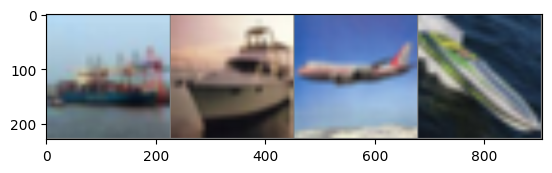

 ship || ship || plane || ship


In [ ]:
#Obserevemos algunas imagenes de prueba

def imageshow(image):

   image = image/2 + 0.5
   npimage = image.numpy()
   plt.imshow(np.transpose(npimage, (1, 2, 0)))
   plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

num_images = 4
imageshow(torchvision.utils.make_grid(images[:num_images]))

print(' ' + ' || '.join(classes[labels[j]]
        for j in range(num_images)))



Al final, se ajustaron 54 millones de parametros

In [15]:
count_params( model ) 

54575114